1. Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

2. Записываем исходные данные 

In [2]:
t = [4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]
l = [0.87, 0.83, 0.81, 0.8, 0.79, 0.77, 0.74, 0.66, 0.59, 0.52, 0.45, 0.36, 0.29, 0.25, 0.19]
m = [20, 23, 15, 12.5, 12.5, 14, 12.5, 14.5, 11, 9.5, 2.5, 2.5, 2.5, 4, 1]

3. Находим чистый коэффициент воспроизводства R0 по заданной формуле

In [3]:
R0 = 0
for i in range(len(t)):
    R0 += l[i] * m[i]
print(f"Чистый коэффициент воспроизводства R0 = {R0}")

Чистый коэффициент воспроизводства R0 = 113.48499999999997


4. Строим график функции (в левой части уравнения, то есть без вычитания единицы)

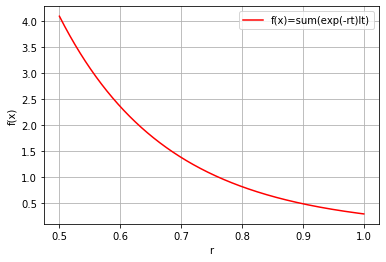

In [4]:
# r - массив значений внутреннего коэффициента естественной репродукции
r = np.linspace(0.5, 1, 1000)

# f - массив, в который будем записывать значения функции на соответствующем элементе массива r
f = np.linspace(0, 0, 1000)

# для каждого r считаем значение функции f
for i in range(len(f)):
    for j in range(len(t)):
        f[i] += np.exp(-r[i] * t[j]) * l[j] * m[j]

# объявляем объект для рисвания графика
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# добавляем сетку
ax.grid(which='both')
# добавляем график функции
line1, = ax.plot(r, f, 'r', label='f(x)=sum(exp(-rt)lt)')
# подписываем оси
plt.xlabel("r")
plt.ylabel("f(x)")
# добавляем легенду
ax.legend()
# и наконец рисуем
plt.show()

5. Определяем функцию, корнем которой является внутренний коэффициент естественной репродукции r

In [5]:
def func(x):
    # иниициализируем переменную, в которую будем накапливать сумму
    v = 0
    for j in range(len(t)):
        # для каждого возраста находим значение выражения согласно формуле и суммируем эти значения
        v += np.exp(-x * t[j]) * l[j] * m[j]
    v -= 1
    return v

6. Численно решаем это уравнение, используя scipy.optimize.brentq

In [6]:
solution = brentq(func, a=0.5, b=1)
print(f"внутренний коэффициент естественной репродукции r = {solution}")

внутренний коэффициент естественной репродукции r = 0.7619840766979892


### Вывод:
В текущей работе проведен анализ фертильности особей рисового жука долгоносика (Calandra oryzae), выращиваемых в оптимальных условиях. Найдено, что одна самка этого жука за всю жизнь рождает в среднем $R_{0} = 113$ особей ($R_0$ - чистый коэффициент воспроизводства). Также найден коэффициент естественной репродукции (Intrinsic Rate of Natural Increase) $r$ путем решения уравнения

$$\sum \limits _{t} e^{rt}l_{t}m_{t} = 1$$.
- $t$ - возраст в неделях
- $l_t$ - вероятность дожития до этого возраста
- $m_t$ - среднее число потомков женского пола, рожденных одной особью в этом возрасте

Для этого был построен график функции в левой части уравнения, подобран показательный диапазон для $r$ и использован встроенный метод optimize.brentq библиотеки scipy. В итоге $r = 0.762$.